In [1]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to WordNet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
def pos_tags(lyrics):
    # Tokenize the lyrics
    tokens = word_tokenize(lyrics)
    tokens = [word for word in tokens if word.isalnum()]
    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)
    
    return tagged_tokens

def preprocess_lyrics(lyrics):
    # Tokenize the lyrics
    tokens = word_tokenize(lyrics)
    tokens = [word for word in tokens if word.isalnum()]

    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize the tokens based on their POS tags
    lemmatized_tokens = []
    for word, tag in tagged_tokens:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag is None:
            # If no corresponding WordNet POS tag, keep the word as is
            lemmatized_tokens.append(word.lower())
        else:
            # Lemmatize the word with the appropriate POS tag
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos=wn_tag))

    return lemmatized_tokens

In [2]:
import utility_functions as utils
import importlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import itertools
from collections import Counter
import os

importlib.reload(utils)
path_to_east_coast_lyrics = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Lyrics/east_coast'
path_to_west_coast_lyrics = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Lyrics/west_coast'

concreteness_df = pd.read_excel('./concreteness_scores.xlsx')
concreteness_ratings = concreteness_df.set_index('Word')['Conc.M'].to_dict()

importlib.reload(utils)

<module 'utility_functions' from '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Lyrics/utility_functions.py'>

In [3]:
# Load data into dataframes
east_coast_df = utils.load_txt_into_dataframe(path_to_east_coast_lyrics)
west_coast_df = utils.load_txt_into_dataframe(path_to_west_coast_lyrics)

In [4]:
# Clean up lyrics column
east_coast_df['Lyrics'] = east_coast_df['Lyrics'].apply(utils.cleanup)
west_coast_df['Lyrics'] = west_coast_df['Lyrics'].apply(utils.cleanup)

In [5]:
# POS Tags
east_coast_df['Tagged Tokens'] = east_coast_df['Lyrics'].apply(pos_tags)
west_coast_df['Tagged Tokens'] = west_coast_df['Lyrics'].apply(pos_tags)

In [6]:
# Preprocessing lyrics
east_coast_df['Tokens'] = east_coast_df['Lyrics'].apply(preprocess_lyrics)
west_coast_df['Tokens'] = west_coast_df['Lyrics'].apply(preprocess_lyrics)

In [7]:
east_coast_df = utils.calculate_correctness_score_of_tokens(east_coast_df, concreteness_ratings)
west_coast_df = utils.calculate_correctness_score_of_tokens(west_coast_df, concreteness_ratings)
east_coast_df = east_coast_df.sort_values(by='Album Release Year', ascending=True)
west_coast_df = west_coast_df.sort_values(by='Album Release Year', ascending=True)

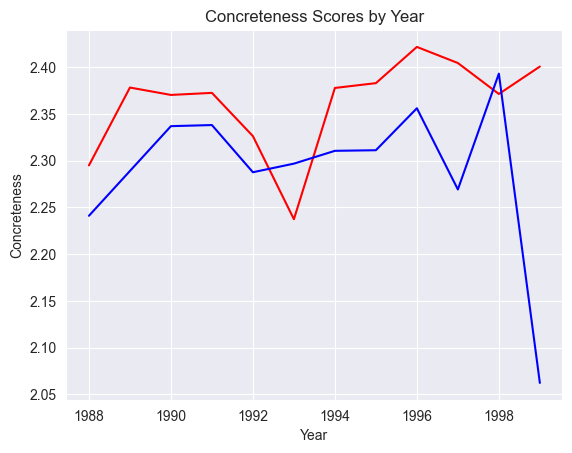

In [38]:
sns.lineplot(east_coast_df, x="Album Release Year", y='Correctness', color="red", errorbar=None)
sns.lineplot(west_coast_df, x="Album Release Year", y='Correctness', color="blue", errorbar=None)
plt.title("Concreteness Scores by Year")
plt.xlabel('Year')
plt.ylabel('Concreteness')
# Display the plot
plt.show()

In [40]:
west_coast_word_count = []
for index, row in west_coast_df.iterrows():
    west_coast_word_count.append(utils.word_count_of_text(row['Lyrics']))

east_coast_word_count = []
for index, row in east_coast_df.iterrows():
    east_coast_word_count.append(utils.word_count_of_text(row['Lyrics']))

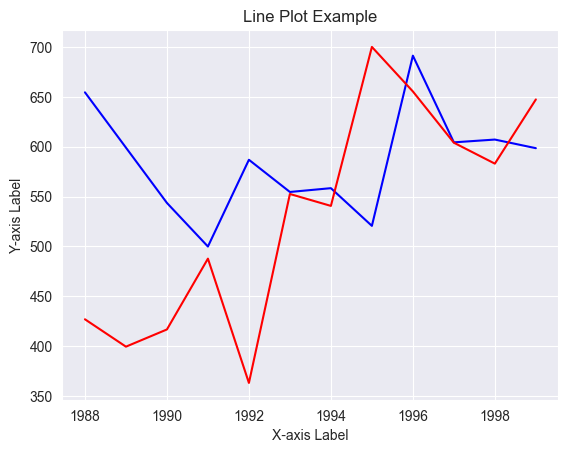

In [41]:
sns.lineplot(x=list(west_coast_df['Album Release Year']), y=west_coast_word_count, color="blue", errorbar=None)
sns.lineplot(x=list(east_coast_df['Album Release Year']), y=east_coast_word_count, color="red", errorbar=None)

# Adding title and labels with Matplotlib functions since Seaborn uses Matplotlib under the hood
plt.title('Line Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [42]:
west_coast_unique_word_count = []
for index, row in west_coast_df.iterrows():
    west_coast_unique_word_count.append(utils.unique_word_count_of_text(row['Lyrics']))

east_coast_unique_word_count = []
for index, row in east_coast_df.iterrows():
    east_coast_unique_word_count.append(utils.unique_word_count_of_text(row['Lyrics']))

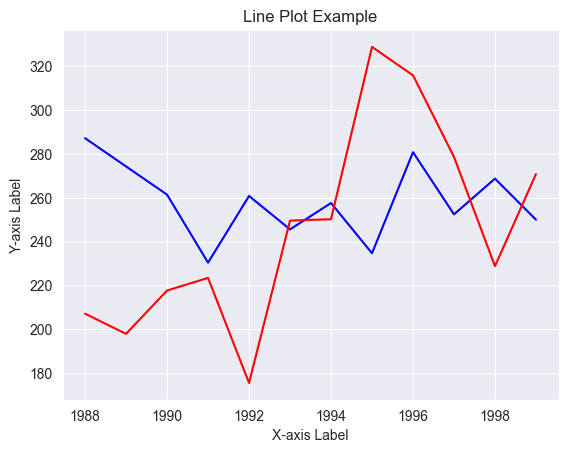

In [43]:
sns.lineplot(x=list(west_coast_df['Album Release Year']), y=west_coast_unique_word_count, color="blue", errorbar=None)
sns.lineplot(x=list(east_coast_df['Album Release Year']), y=east_coast_unique_word_count, color="red", errorbar=None)

# Adding title and labels with Matplotlib functions since Seaborn uses Matplotlib under the hood
plt.title('Line Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [44]:
east_coast_artists = list(set(east_coast_df['Artist']))
mean_correctness = []

for artist in east_coast_artists:
    mean_correctness.append(np.mean(east_coast_df[east_coast_df['Artist'] == artist]['Correctness']))
    
data = pd.DataFrame({'artist': east_coast_artists, 'mean_correctness': mean_correctness})

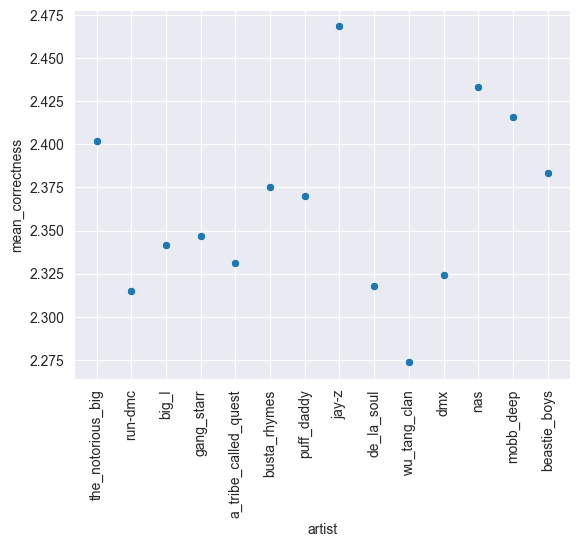

In [45]:
sns.scatterplot(data, x='artist', y='mean_correctness')
plt.xticks(rotation=90)
plt.show()

In [46]:
west_coast_artists = list(set(west_coast_df['Artist']))
mean_correctness = []

for artist in west_coast_artists:
    mean_correctness.append(np.mean(west_coast_df[west_coast_df['Artist'] == artist]['Correctness']))

data = pd.DataFrame({'artist': west_coast_artists, 'mean_correctness': mean_correctness})

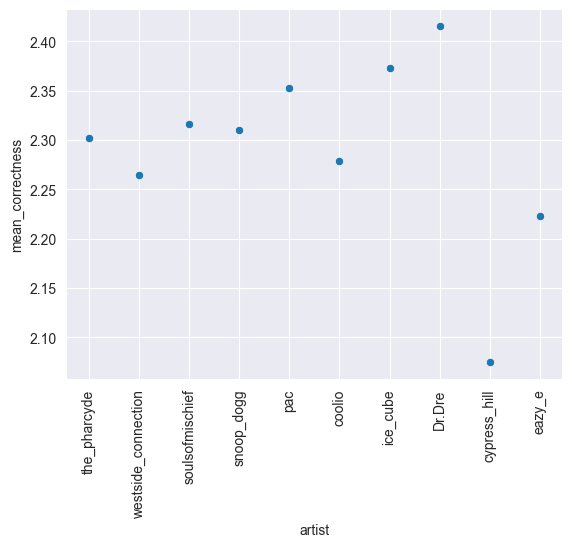

In [47]:
sns.scatterplot(data, x='artist', y='mean_correctness')
plt.xticks(rotation=90)
plt.show()

In [48]:
east_coast_df

,Artist,Album,Album Release Year,Song,Lyrics,Tagged Tokens,Tokens,Correctness
169,run-dmc,Tougher Than Leather (1988),1988,Tougher_Than_Leather,unconceivable unbelievable grammar like a hamm...,"[(unconceivable, JJ), (unbelievable, JJ), (gra...","[unconceivable, unbelievable, grammar, like, a...",2.367207
175,run-dmc,Tougher Than Leather (1988),1988,Radio_Station,radio station on vacation wonder where run was...,"[(radio, NN), (station, NN), (on, IN), (vacati...","[radio, station, on, vacation, wonder, where, ...",2.223610
168,run-dmc,Tougher Than Leather (1988),1988,Ragtime,i woke up this morning got ready to roll put o...,"[(i, NN), (woke, VBD), (up, RP), (this, DT), (...","[i, wake, up, this, morning, get, ready, to, r...",2.398000
173,run-dmc,Tougher Than Leather (1988),1988,Miss_Elaine,my my my teacher came in class breathin hard a...,"[(my, PRP$), (my, PRP$), (my, PRP$), (teacher,...","[my, my, my, teacher, come, in, class, breathi...",2.216087
172,run-dmc,Tougher Than Leather (1988),1988,I_m_Not_Going_Out_Like_That,many of our people stealing gambling many of o...,"[(many, JJ), (of, IN), (our, PRP$), (people, N...","[many, of, our, people, steal, gamble, many, o...",2.282654
...,...,...,...,...,...,...,...,...
334,dmx,...And Then There Was X (1999),1999,Prayer_III,let us pray lord jesus it is you who wakes me ...,"[(let, VB), (us, PRP), (pray, VB), (lord, JJ),...","[let, us, pray, lord, jesus, it, be, you, who,...",2.135244
258,jay-z,Vol. 3... Life And Times Of S. Carter (1999),1999,Big_Pimpin_,uh uh uh uh it's big pimping baby it's big pim...,"[(uh, JJ), (uh, JJ), (uh, NN), (uh, IN), (it, ...","[uh, uh, uh, uh, it, big, pimp, baby, it, big,...",2.405459
257,jay-z,Vol. 3... Life And Times Of S. Carter (1999),1999,Watch_Me,yeah uh uh uh uh boom boom boom d r e say with...,"[(yeah, NN), (uh, NN), (uh, JJ), (uh, JJ), (uh...","[yeah, uh, uh, uh, uh, boom, boom, boom, d, r,...",2.603219
339,dmx,...And Then There Was X (1999),1999,The_Shakedown__Skit_,aye aye yo don't you know x dog i knew you kne...,"[(aye, NN), (aye, NN), (yo, NN), (do, VBP), (y...","[aye, aye, yo, do, you, know, x, dog, i, know,...",2.510800


In [52]:
# JJ: Adjective
# NN: Noun, singular or mass
# NNS: Noun, plural
# IN: Preposition or subordinating conjunction
# DT: Determiner
# VBN: Verb, past participle
# RB: Adverb
# CC: Coordinating conjunction
# VBD: Verb, past tense
# VB: Verb, base form
# VBP: Verb, non-3rd person singular present
# MD: Modal
# PRP: Personal pronoun
# WDT: Wh-determiner (used in questions and relative clauses)
# TO: To (used with the infinitive form of verbs)
# RP: Particle (part of a phrasal verb)
# VBZ: Verb, 3rd person singular present
# FW: Foreign word

In [51]:
pos_east = {}

for index, row in east_coast_df.iterrows():
    for tag in row['Tagged Tokens']:
        word, pos = tag
        if pos in pos_east:
            pos_east[pos] += 1
        else:
            pos_east[pos] = 1

In [53]:
pos_west = {}

for index, row in west_coast_df.iterrows():
    for tag in row['Tagged Tokens']:
        word, pos = tag
        if pos in pos_west:
            pos_west[pos] += 1
        else:
            pos_west[pos] = 1

In [54]:
pos_df = pd.DataFrame({'East': pos_east, 'West': pos_west})
pos_df = pos_df.reset_index()

In [56]:
pos_df.rename(columns={'index': 'Category'})

,Category,East,West
0,JJ,27792,29160
1,NN,76816,82907
2,IN,34484,34643
3,DT,32882,35489
4,VBN,4799,4774
5,RB,16983,16832
6,CC,10849,11837
7,NNS,15379,14609
8,PRP,28175,28791
9,MD,3837,4102


In [62]:
pos_df['Difference'] =  pos_df['East'] - pos_df['West']

In [63]:
pos_df

# NORMALIZE

,index,East,West,Difference
0,JJ,27792,29160,-1368
1,NN,76816,82907,-6091
2,IN,34484,34643,-159
3,DT,32882,35489,-2607
4,VBN,4799,4774,25
5,RB,16983,16832,151
6,CC,10849,11837,-988
7,NNS,15379,14609,770
8,PRP,28175,28791,-616
9,MD,3837,4102,-265


In [61]:
df_long = pos_df.melt(id_vars='Category', value_vars=['East', 'West'], var_name='Region', value_name='Value')

# Now, create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Category', y='Value', hue='Region')

# Improve the legibility of the x labels, if necessary
plt.xticks(rotation=45)

# Add title and labels as needed
plt.title('Counts by Category and Region')
plt.xlabel('Category')
plt.ylabel('Counts')

# Show the plot
plt.show()

KeyError: 'Category'